# Analysis of harvested plant masses

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 10)

In [3]:

!ls ../data/Measurements/prepared-datasets/lifetime_corrected_parquet/BATCH=2018-11-08


_SUCCESS
part-00000-47ad0211-d063-4e37-a0c1-1a7f388d6538-c000.snappy.parquet


In [4]:
df_lifetime = pd.read_parquet("../data/Measurements/prepared-datasets/lifetime_corrected_parquet/BATCH=2018-11-08")
df_harvest = pd.read_parquet("../data/Measurements/prepared-datasets/harvest_total_parquet/BATCH=2018-11-08")

df_lifetime

,DATE_PLANTED,DATE_HARVESTED,TRAY,RACK,DAYS_GROWTH,TOTAL_WEIGHT,HARVEST_IDX,PLANT_PLANTED,PLANT_HARVESTED,NEXT_DATE_PLANTED,CUM_WEIGHT,CUM_DAYS
0,2018-08-20 22:00:00,2018-09-26 22:00:00,14,1,37,624.0,1,Leaf parsley,Leaf parsley,2018-11-07 23:00:00,624.0,37
1,2018-08-20 22:00:00,2018-11-03 23:00:00,14,1,75,28.0,2,Leaf parsley,Thymes,2018-11-07 23:00:00,652.0,112
2,2018-08-12 22:00:00,2018-09-19 22:00:00,17,1,38,500.0,1,Coriander,Coriander,2018-11-07 23:00:00,500.0,38
3,2018-08-12 22:00:00,2018-11-05 23:00:00,17,1,85,439.0,2,Coriander,Mint,2018-11-07 23:00:00,939.0,123
4,2018-08-16 22:00:00,2018-09-19 22:00:00,22,1,34,380.0,1,Coriander,Coriander,2018-11-07 23:00:00,380.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...
290,2018-01-09 23:00:00,2018-03-06 23:00:00,143,5,56,1778.0,2,Coriander,Thai basil,2018-11-07 23:00:00,2288.0,57
291,2018-01-09 23:00:00,2018-09-26 22:00:00,143,5,260,401.0,3,Coriander,Coriander,2018-11-07 23:00:00,2689.0,317
292,2018-01-09 23:00:00,2018-01-10 23:00:00,152,5,1,450.0,1,Coriander,Coriander,2018-11-07 23:00:00,450.0,1
293,2018-01-09 23:00:00,2018-09-26 22:00:00,152,5,260,473.0,2,Coriander,Coriander,2018-11-07 23:00:00,923.0,261


# Mass harvested by date

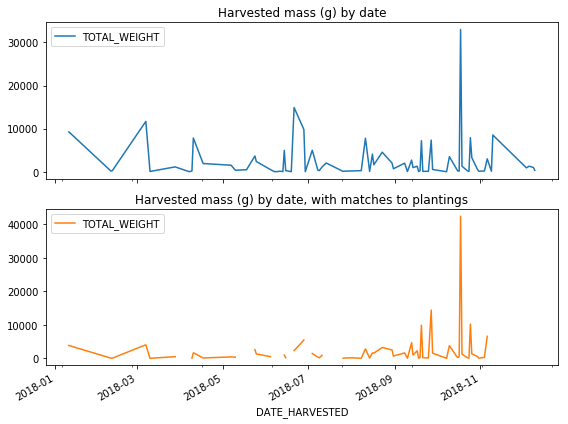

In [5]:
pd.DataFrame(data=[
    df_harvest.groupby(["DATE_HARVESTED"])["TOTAL_WEIGHT"].sum(),
    df_lifetime.groupby(["DATE_HARVESTED"])["TOTAL_WEIGHT"].sum()
]).T.plot(
    subplots=True,
    title=["Harvested mass (g) by date", "Harvested mass (g) by date, with matches to plantings"],
    figsize=(8, 6)
)

plt.tight_layout()

# Trended by plants
(top 10)

In [6]:
N = 10
topN = df_lifetime.groupby(["PLANT_HARVESTED"])["TOTAL_WEIGHT"].sum().sort_values(ascending=False).index[:N].tolist()

In [7]:
df_harvest_trends = df_lifetime.groupby(["DATE_HARVESTED", "PLANT_HARVESTED"])[["TOTAL_WEIGHT"]].sum().unstack(-1)['TOTAL_WEIGHT'][topN]
df_harvest_trends

PLANT_HARVESTED,Coriander,Mint,Thai basil,Leaf parsley,Coriander Marino,Coriander Ubeiset,Ruccola,Basilikum Genovese 'Aroma 2',Mint ’maroccan’ LBH,Mint ’maroccan’ Kristiansand
DATE_HARVESTED,,,,,,,,,,
2018-01-10 23:00:00,3850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-09 23:00:00,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-10 23:00:00,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-06 23:00:00,NaN,NaN,4067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-09 23:00:00,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-10-25 22:00:00,600.0,NaN,NaN,322.0,NaN,NaN,450.0,NaN,NaN,NaN
2018-10-29 23:00:00,NaN,70.0,45.0,450.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-30 23:00:00,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


['Coriander', 'Mint', 'Thai basil', 'Leaf parsley', 'Coriander Marino', 'Coriander Ubeiset', 'Ruccola', "Basilikum Genovese 'Aroma 2'", 'Mint ’maroccan’ LBH', 'Mint ’maroccan’ Kristiansand']


Text(0.5, 1.0, 'Top %d harvested plants, mass sampled to 14 days')

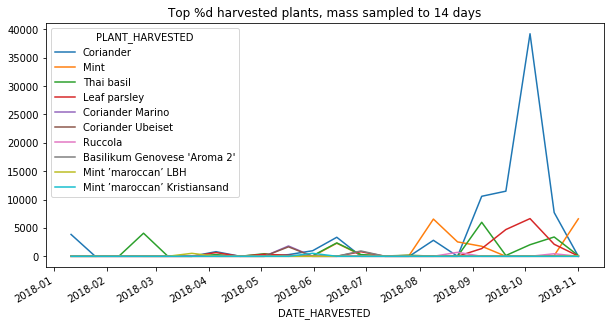

In [8]:
df_harvest_trends.resample("14d").sum().plot(figsize=(10,5))
print(topN)
plt.title("Top %d harvested plants, mass sampled to 14 days")